In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from scipy import stats
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### Data Familiarization and Cleaning

In [29]:
df = pd.read_csv('/content/netflix_titles.csv')

In [30]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [31]:
# print(df.dtypes,"\n")
# print(df.shape,"\n")
# print(df.isna().sum())

In [32]:
df = df.dropna(subset=['rating','date_added'],axis=0)
# print(df.isna().sum())

In [33]:
df['director']= df['director'].fillna(df['director'].mode()[0])
df['cast']= df['cast'].fillna(df['cast'].mode()[0])
df['country']= df['country'].fillna(df['country'].mode()[0])

df.isna().sum()

/tmp/ipython-input-33-4165459152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['director']= df['director'].fillna(df['director'].mode()[0])
/tmp/ipython-input-33-4165459152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cast']= df['cast'].fillna(df['cast'].mode()[0])
/tmp/ipython-input-33-4165459152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [34]:
if df['release_year'].isnull().sum() > 0:
  imp = IterativeImputer()
  df['release_year'] = imp.fit_transform(df[['release_year']])

In [35]:
df['duration_length'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')
df['genre'] = df['listed_in'].str.split(',')
df['countries'] = df['country'].str.split(',')
df['countries'].head(5)

/tmp/ipython-input-35-961071817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_length'] = df['duration'].str.extract('(\d+)').astype(float)
/tmp/ipython-input-35-961071817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')
/tmp/ipython-input-35-961071817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,countries
0,"[United States, India, South Korea, China]"
1,[United Kingdom]
2,[United States]
3,[United States]
4,[United States]


In [36]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

currentYear = pd.Timestamp.now().year

df['content_age'] = currentYear - df['release_year']


### Feature Engineering

In [37]:
norm = Normalizer()
ss = StandardScaler()

In [38]:
df['scaled_duration_length'] = ss.fit_transform(df[['duration_length']])
df['norm_content_age'] = norm.fit_transform(df[['content_age']])
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_length,duration_type,genre,countries,content_age,scaled_duration_length,norm_content_age
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,90.0,min,"[Children & Family Movies, Comedies]","[United States, India, South Korea, China]",6,0.423074,1.0
1,80117401,Movie,Jandino: Whatever it Takes,"Raúl Campos, Jan Suter",Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,94.0,min,[Stand-Up Comedy],[United Kingdom],9,0.501725,1.0
2,70234439,TV Show,Transformers Prime,"Raúl Campos, Jan Suter","Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",1.0,Season,[Kids' TV],[United States],12,-1.326918,1.0


In [39]:
labels = ['Classic','90s','2000s','2010s','Modern']
bins = [1960,1990,2000,2010,2020,2025]

df['release_year_ranges'] = pd.cut(df['release_year'], bins=bins, labels=labels)
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_length,duration_type,genre,countries,content_age,scaled_duration_length,norm_content_age,release_year_ranges
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,90.0,min,"[Children & Family Movies, Comedies]","[United States, India, South Korea, China]",6,0.423074,1.0,2010s
1,80117401,Movie,Jandino: Whatever it Takes,"Raúl Campos, Jan Suter",Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,94.0,min,[Stand-Up Comedy],[United Kingdom],9,0.501725,1.0,2010s
2,70234439,TV Show,Transformers Prime,"Raúl Campos, Jan Suter","Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",1.0,Season,[Kids' TV],[United States],12,-1.326918,1.0,2010s


In [40]:
df['latest'] = np.where(df['content_age'] < 2, 1, 0)

### Univariate Analysis

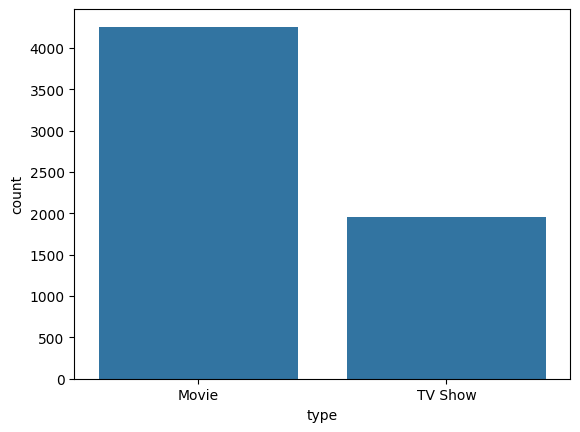

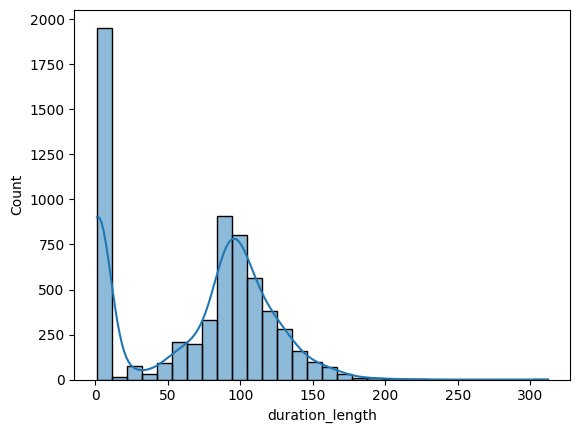

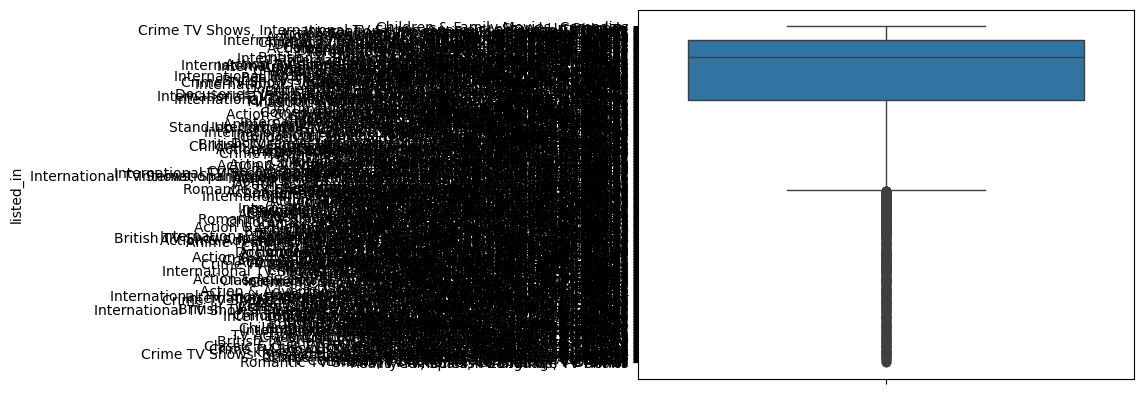

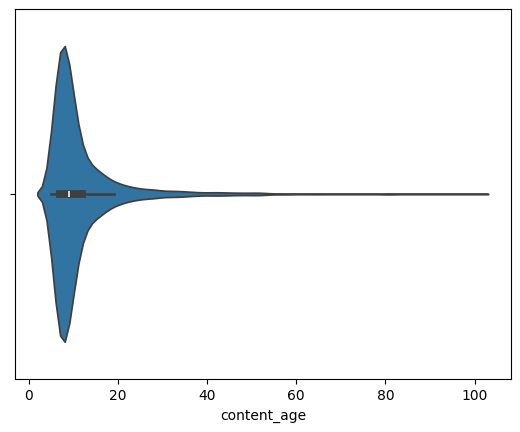

In [41]:
sns.countplot(data=df, x='type')
plt.show()

sns.histplot(df['duration_length'].dropna(), bins=30, kde=True)
plt.show()

sns.boxplot(data=df, y='listed_in')
plt.show()

sns.violinplot(data=df, x='content_age')
plt.show()

In [42]:
print(f"Mean: {df['duration_length'].mean()}")
print(f"Median: {df['duration_length'].median()}")
print(f"Mode: {df['type'].mode()[0]}")
print(f"Standard Dev.: {df['duration_length'].std()}")

q1 = df['duration_length'].quantile(0.25)
q3 = df['duration_length'].quantile(0.75)

iQR = q3 - q1

print (f"IQR: {iQR}")

Mean: 68.4835854522047
Median: 87.0
Mode: Movie
Standard Dev.: 50.861475787206324
IQR: 103.0


### Bivariate Analysis

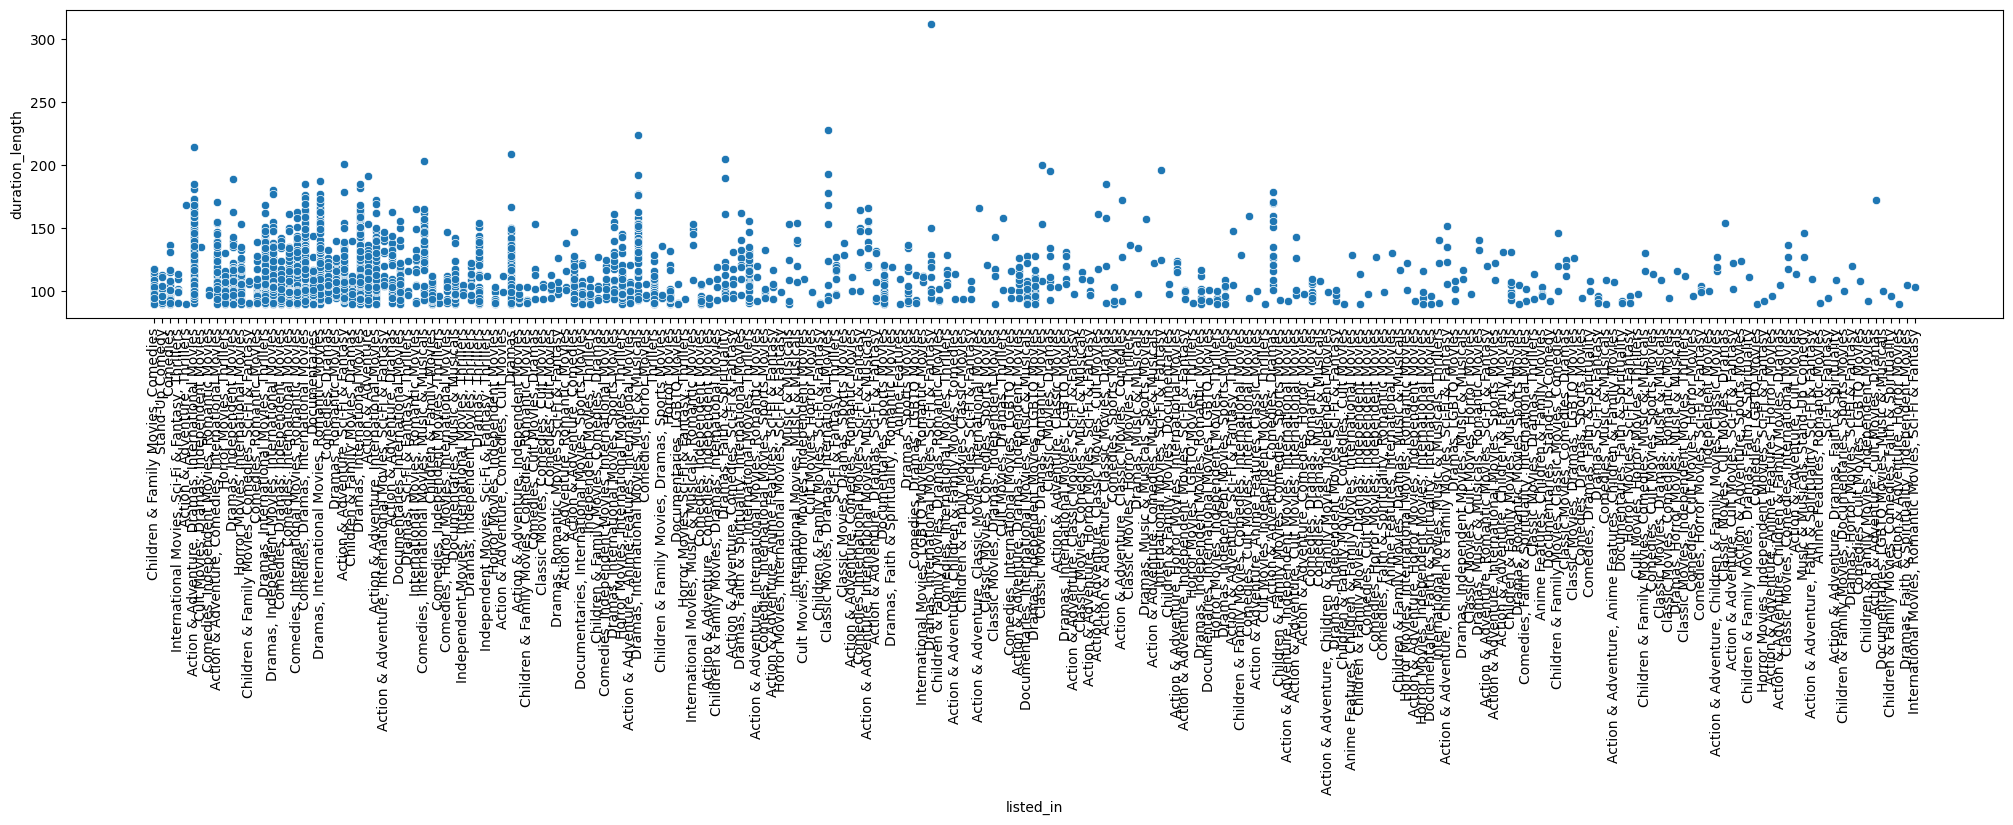

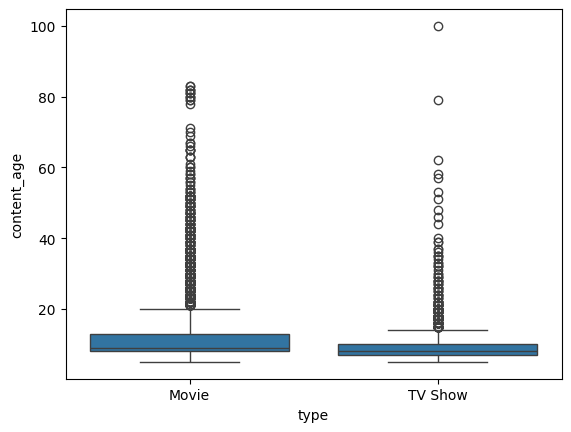

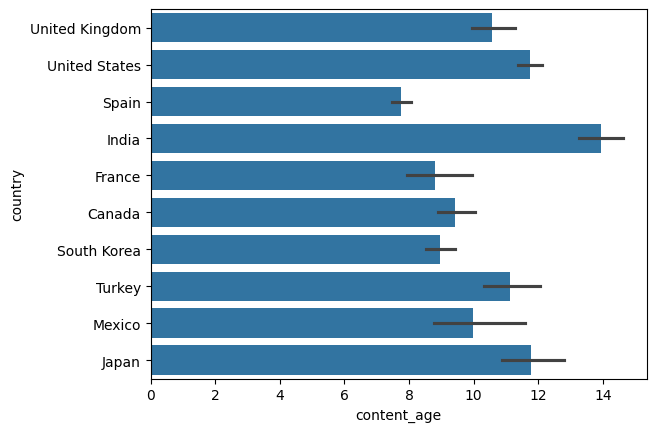

country,Argentina,"Argentina, Brazil, France, Poland, Germany, Denmark","Argentina, Chile","Argentina, Chile, Peru","Argentina, France","Argentina, France, Germany","Argentina, Italy","Argentina, Spain","Argentina, United States","Argentina, United States, Mexico",...,"United States, United Kingdom, Spain, South Korea","United States, Uruguay","United States, Venezuela",Uruguay,"Uruguay, Argentina, Spain","Uruguay, Spain, Mexico",Venezuela,"Venezuela, Colombia",Vietnam,West Germany
listed_in,,,,,,,,,,,,,,,,,,,,,
Action & Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Action & Adventure, Anime Features, Children & Family Movies",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Action & Adventure, Anime Features, Classic Movies",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Action & Adventure, Anime Features, Horror Movies",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Action & Adventure, Anime Features, International Movies",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Genre vs Duration
plt.figure(figsize=(25,4))
sns.scatterplot(data=df[df['duration_length'] >= 90], y='duration_length', x='listed_in')
plt.xticks(rotation=90)
plt.show()


# Content Age vs Type
sns.boxplot(data=df, x='type', y='content_age')
plt.show()


# Content Age vs Country(Top 10 countries)
top10Country = df['country'].value_counts().head(10).index
sns.barplot(data=df[df['country'].isin(top10Country)], x='content_age', y='country')
plt.show()


# Genre vs Country
genreXcountry = pd.crosstab(df['listed_in'], df['country'])
genreXcountry.head(5)

### Multivariate Analysis

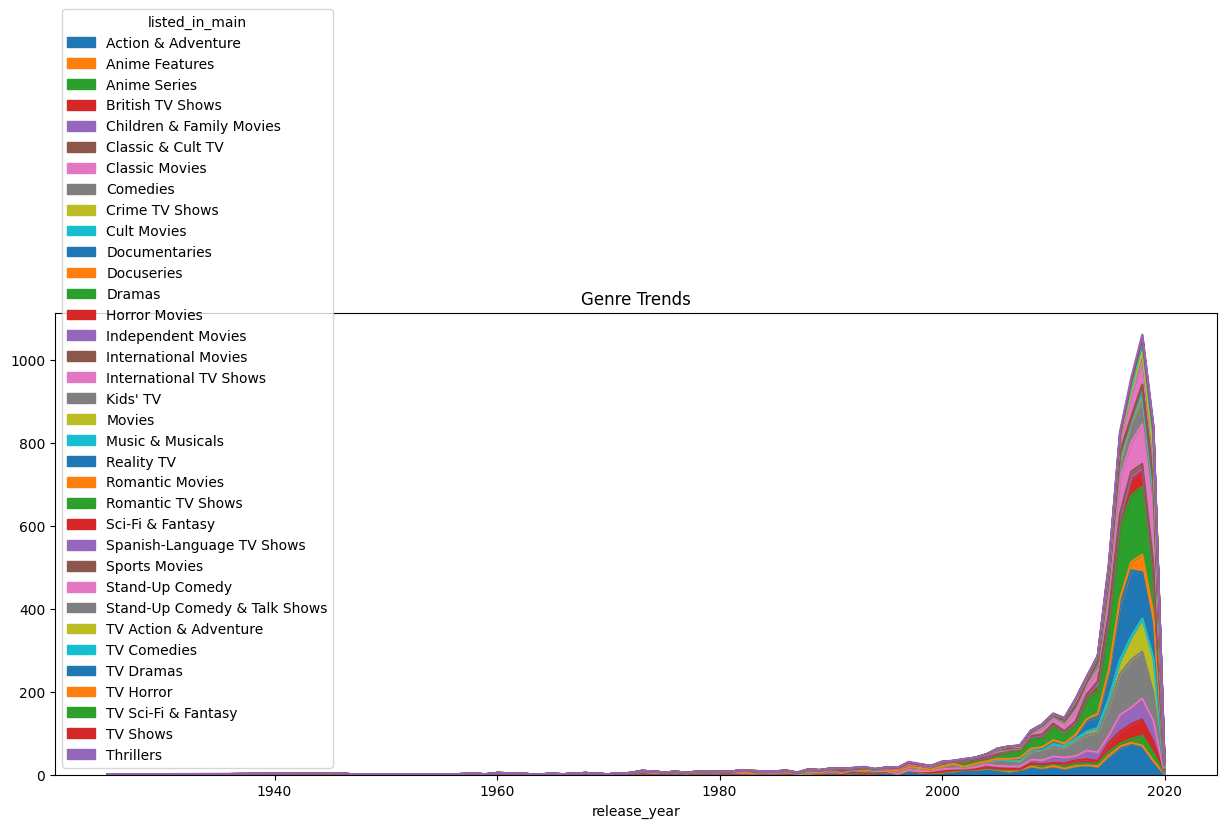

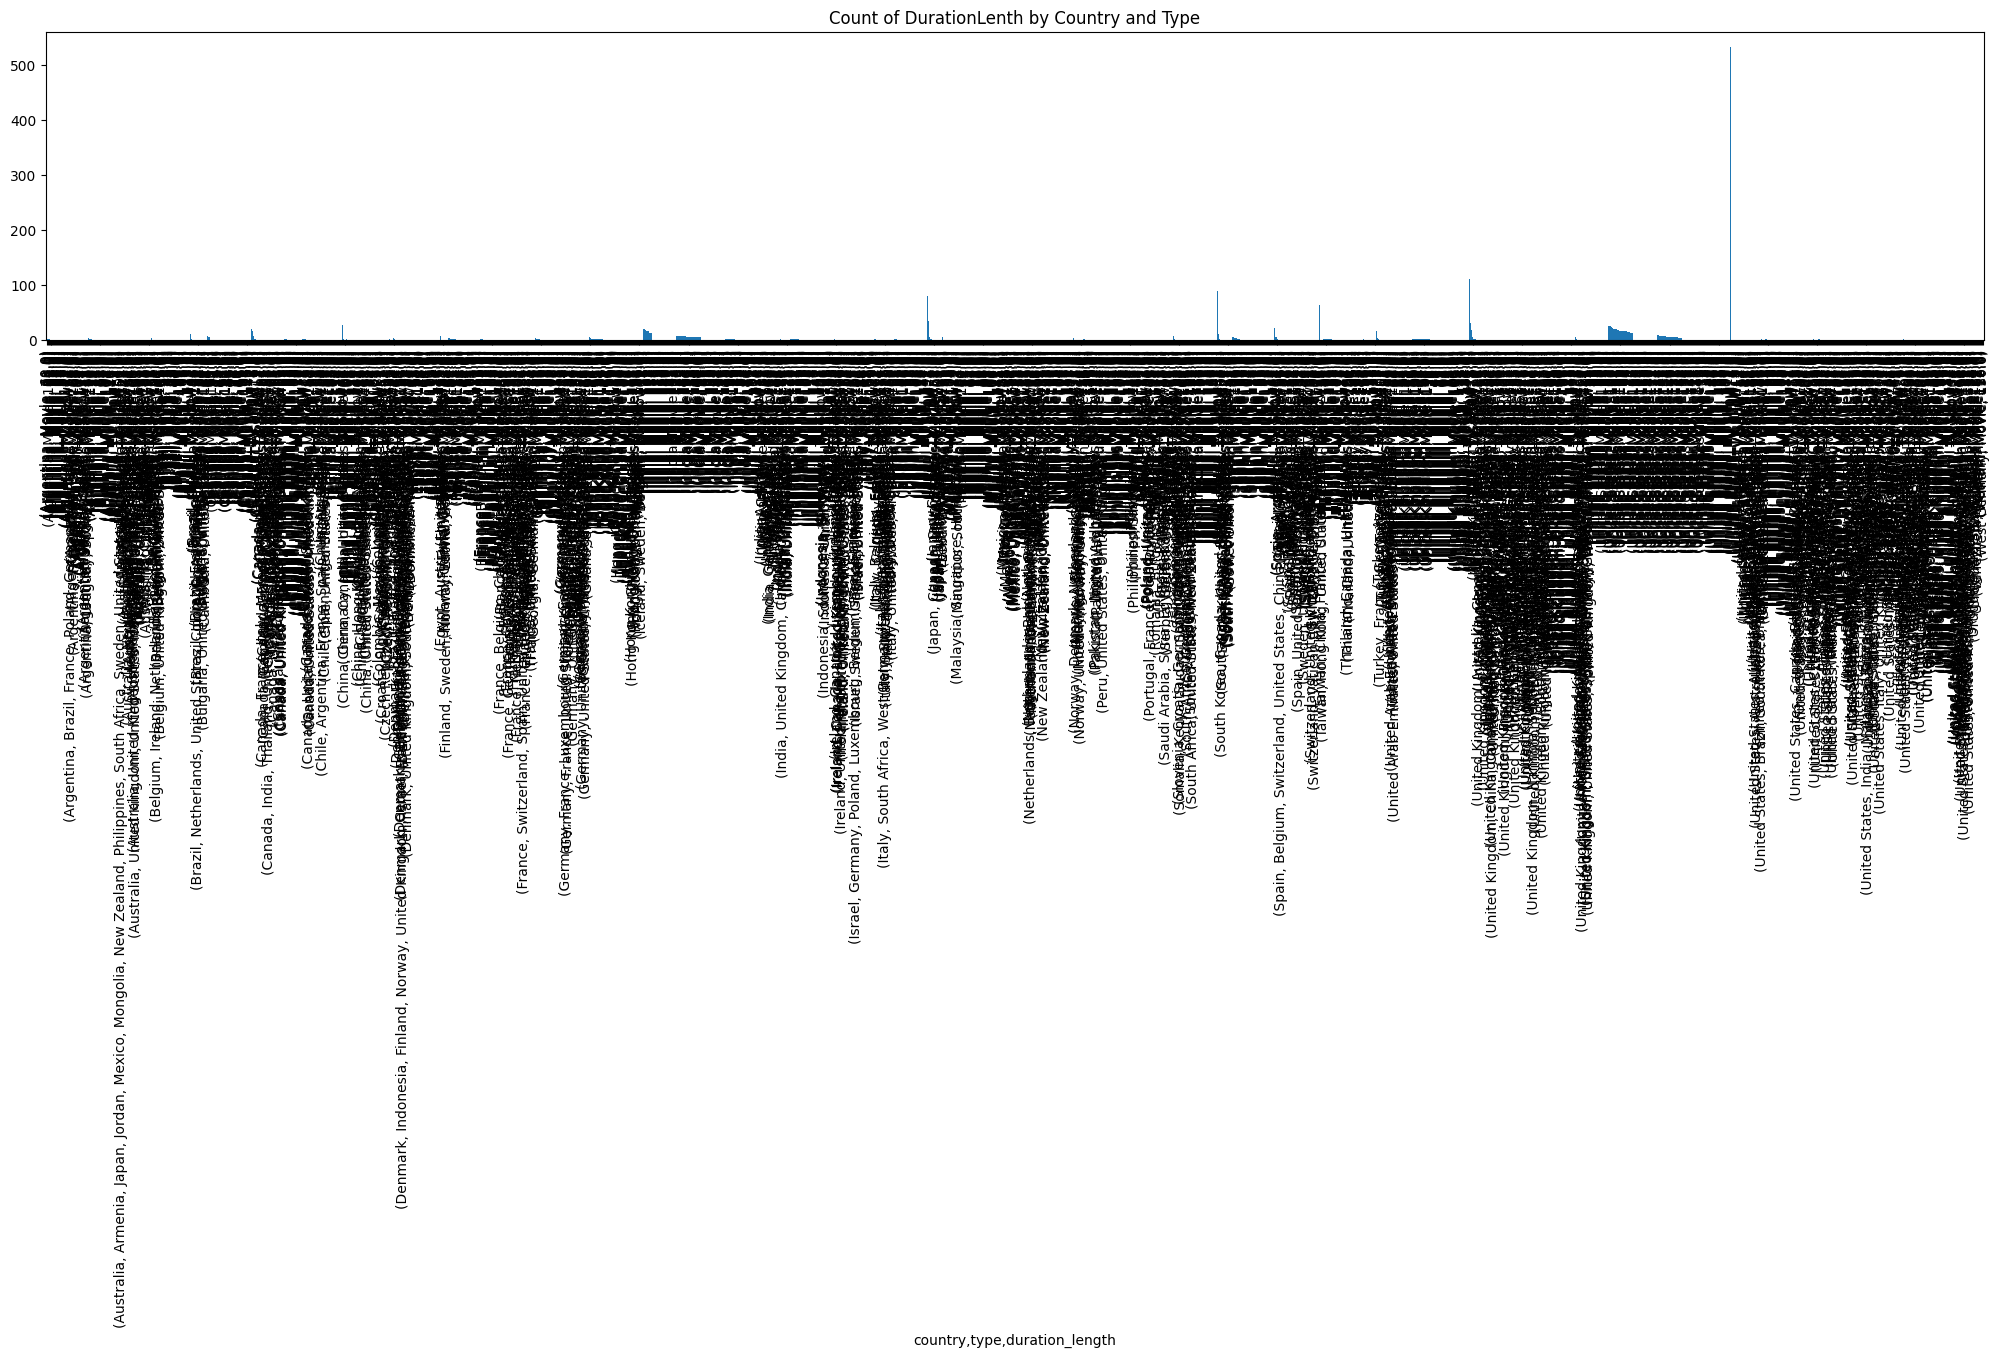

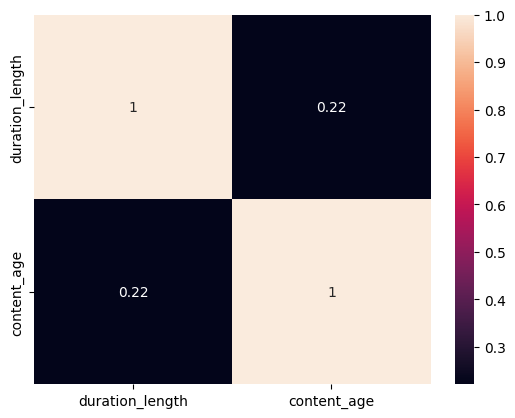

In [44]:
# Genre x Year x Type
df['listed_in_main'] = df['listed_in'].str.split(',').str[0]
genreYear = pd.pivot_table(df, index='release_year', columns='listed_in_main', values='show_id', aggfunc='count')
genreYear.plot(kind='area', stacked=True, figsize=(15,6), title='Genre Trends')
plt.show()


# country x type x duration
gpData = df.groupby(['country','type'])['duration_length'].value_counts()
gpData.plot(kind='bar', figsize=(25,4), title='Count of DurationLenth by Country and Type')
plt.show()


# Genre x content age
sns.heatmap(df[['duration_length','content_age']].corr(), annot=True)
plt.show()

### Outlier Analysis

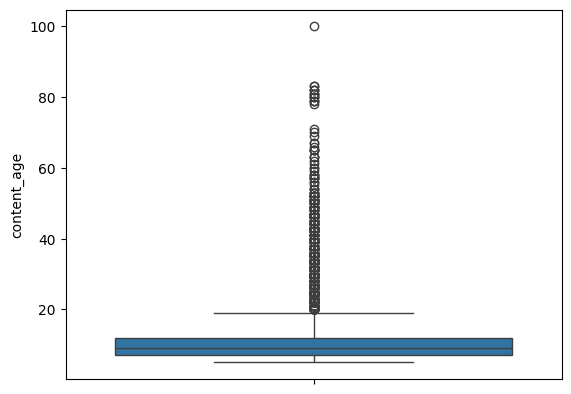

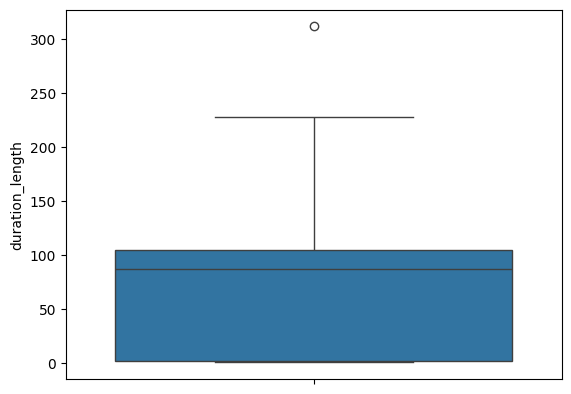

In [47]:
sns.boxplot(data=df, y='content_age')
plt.show()

sns.boxplot(data=df, y='duration_length')
plt.show()

In [57]:
iQR_ContentAage = (df['content_age'].quantile(0.75) - df['content_age'].quantile(0.25))
print(f"IQR Content Age: {iQR_ContentAage}")

outlier = df[(np.abs(df['content_age']) > 3) | (np.abs(df['duration_length']) > 3)]
outlier[['title','type','duration','content_age']].head(5)

IQR Content Age: 5.0


,title,type,duration,content_age
0,Norm of the North: King Sized Adventure,Movie,90 min,6
1,Jandino: Whatever it Takes,Movie,94 min,9
2,Transformers Prime,TV Show,1 Season,12
3,Transformers: Robots in Disguise,TV Show,1 Season,9
4,#realityhigh,Movie,99 min,8


In [51]:
df['zScore_durationLength'] = stats.zscore(df['duration_length'])
df['zScore_contentAge'] = stats.zscore(df['content_age'])
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,genre,countries,content_age,scaled_duration_length,norm_content_age,release_year_ranges,latest,listed_in_main,zScore_durationLength,zScore_contentAge
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,...,"[Children & Family Movies, Comedies]","[United States, India, South Korea, China]",6,0.423074,1.0,2010s,0,Children & Family Movies,0.423074,-0.639282
1,80117401,Movie,Jandino: Whatever it Takes,"Raúl Campos, Jan Suter",Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,...,[Stand-Up Comedy],[United Kingdom],9,0.501725,1.0,2010s,0,Stand-Up Comedy,0.501725,-0.299220
2,70234439,TV Show,Transformers Prime,"Raúl Campos, Jan Suter","Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,...,[Kids' TV],[United States],12,-1.326918,1.0,2010s,0,Kids' TV,-1.326918,0.040843


### Advanced Filtering and Discovery

In [77]:
pakistaniContent = df[df['country'].str.contains('Pakistan') | df['title'].str.contains('Urdu')]
pakistaniContent[['title','type','listed_in','release_year']].head(5)

,title,type,listed_in,release_year
55,Saawan,Movie,"Dramas, Independent Movies, International Movies",2016
243,Janaan,Movie,"Comedies, Dramas, International Movies",2016
404,Dukhtar,Movie,"Dramas, Independent Movies, International Movies",2014
919,Zindagi Kitni Haseen Hay,Movie,"Dramas, International Movies, Romantic Movies",2016
1505,Moor,Movie,"Dramas, Independent Movies, International Movies",2015


In [86]:
longerThan3Seasons = df[df['type'].str.contains('TV Show') & (df['duration_length'] > 3) & df['duration_type'].str.lower().str.contains('seasons')]
longerThan3Seasons[['title','type','listed_in','duration','release_year']].value_counts()

,,,,,count
title,type,listed_in,duration,release_year,
All Hail King Julien,TV Show,"Kids' TV, TV Comedies",5 Seasons,2017,1
American Horror Story,TV Show,"TV Horror, TV Mysteries, TV Thrillers",8 Seasons,2018,1
Arrested Development,TV Show,TV Comedies,5 Seasons,2019,1
Arrow,TV Show,"Crime TV Shows, TV Action & Adventure",7 Seasons,2019,1
Bates Motel,TV Show,"Crime TV Shows, TV Dramas, TV Horror",5 Seasons,2017,1
...,...,...,...,...,...
West Coast Customs,TV Show,"Docuseries, Reality TV",6 Seasons,2015,1
When Calls the Heart,TV Show,TV Dramas,5 Seasons,2017,1
Young & Hungry,TV Show,TV Comedies,5 Seasons,2017,1


In [92]:
longerMovies = df[df['type'].str.contains('Movie') & (df['duration_length'] > 150)]
longerMovies[['title','type','listed_in','duration','release_year']].value_counts()

,,,,,count
title,type,listed_in,duration,release_year,
Sarkar,Movie,"Action & Adventure, Dramas, International Movies",162 min,2018,2
A Fortunate Man,Movie,"Dramas, International Movies",168 min,2018,1
Aarakshan,Movie,"Dramas, International Movies",164 min,2011,1
Aashik Awara,Movie,"Dramas, International Movies, Music & Musicals",154 min,1993,1
Aitraaz,Movie,"International Movies, Music & Musicals, Romantic Movies",153 min,2004,1
...,...,...,...,...,...
You Carry Me,Movie,"Dramas, International Movies",157 min,2015,1
Yuva,Movie,"Dramas, International Movies",160 min,2004,1
Zero,Movie,"Comedies, Dramas, International Movies",159 min,2018,1


In [93]:
topActors = df['cast'].str.split(', ').explode().value_counts().head(5)
topActors

,count
cast,
David Attenborough,585
Anupam Kher,33
Shah Rukh Khan,30
Naseeruddin Shah,27
Om Puri,27


In [96]:
topDirectors = df['director'].str.split(', ').explode().value_counts().head(5)
topDirectors

,count
director,
Jan Suter,1976
Raúl Campos,1974
Marcus Raboy,14
Jay Karas,14
Jay Chapman,12
